# Visualization and Exploration of the FeCoNiCuMo Dataset

<p width="10%">
    <img width="50%" src="images/slab.png"> 
</p>

<div style="text-align: left; font-size: 16px; color: #224CA0 ;">
    <strong> Note: </strong>
</div>

This notebook provides the code used to generate the publication's data visualization. For scientific insight and the data science/ML code, see the 'Neural_Net_Decomposition_Method' notebook.

In [1]:
#Package imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set_theme()

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split

#Helper functions for specific feature engineering used in paper and NN decomp alg
import helpers

In [2]:
#Create Dictionnary for chemical descriptors you wish to use
element_dict = {'Co': [9,4,1.88],
                'Fe': [8,4,1.83],
                'Cu': [11,4,1.9],
                'Ni': [10,4,1.91],
                'Mo': [6,5,2.16]} 

#Initialize Model_Analyzer class with the dictionnary, number of sites, dataset
Model_Manipulator = helpers.Model_Analyzer(element_dict,
                                        10,
                                       'All_data.csv')
#Read in 'CO','CHO' or 'COOH' dataset
df_COOH = Model_Manipulator.import_dataset('COOH')

#Data pre-processing, training and fitting
x,y = Model_Manipulator.feature_embedding() 
nn,x_train, x_test, y_train, y_test = Model_Manipulator.train_model(0.15,3000) #test split, epochs (default 3000)

#Import Influences used in the publication
vis = Model_Manipulator.import_influences('COOH')

#Calculate standard deviation for parity plot 
df,df1,df2 = Model_Manipulator.calculate_std(x_train, x_test, y_train, y_test)

2023-07-23 19:31:40.384958: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-23 19:31:40.461979: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


<div style="text-align: left; font-size: 16px; color: #224CA0 ;">
    <strong> **Note** We could import this code into a class to make the notebook appear cleaner however providing the raw code like this makes replicating the work for your own datasets easier and more convenient </strong>
</div>

Text(0.5, 1.0, 'Parity Plot (with 1 Standard Deviation Range)')

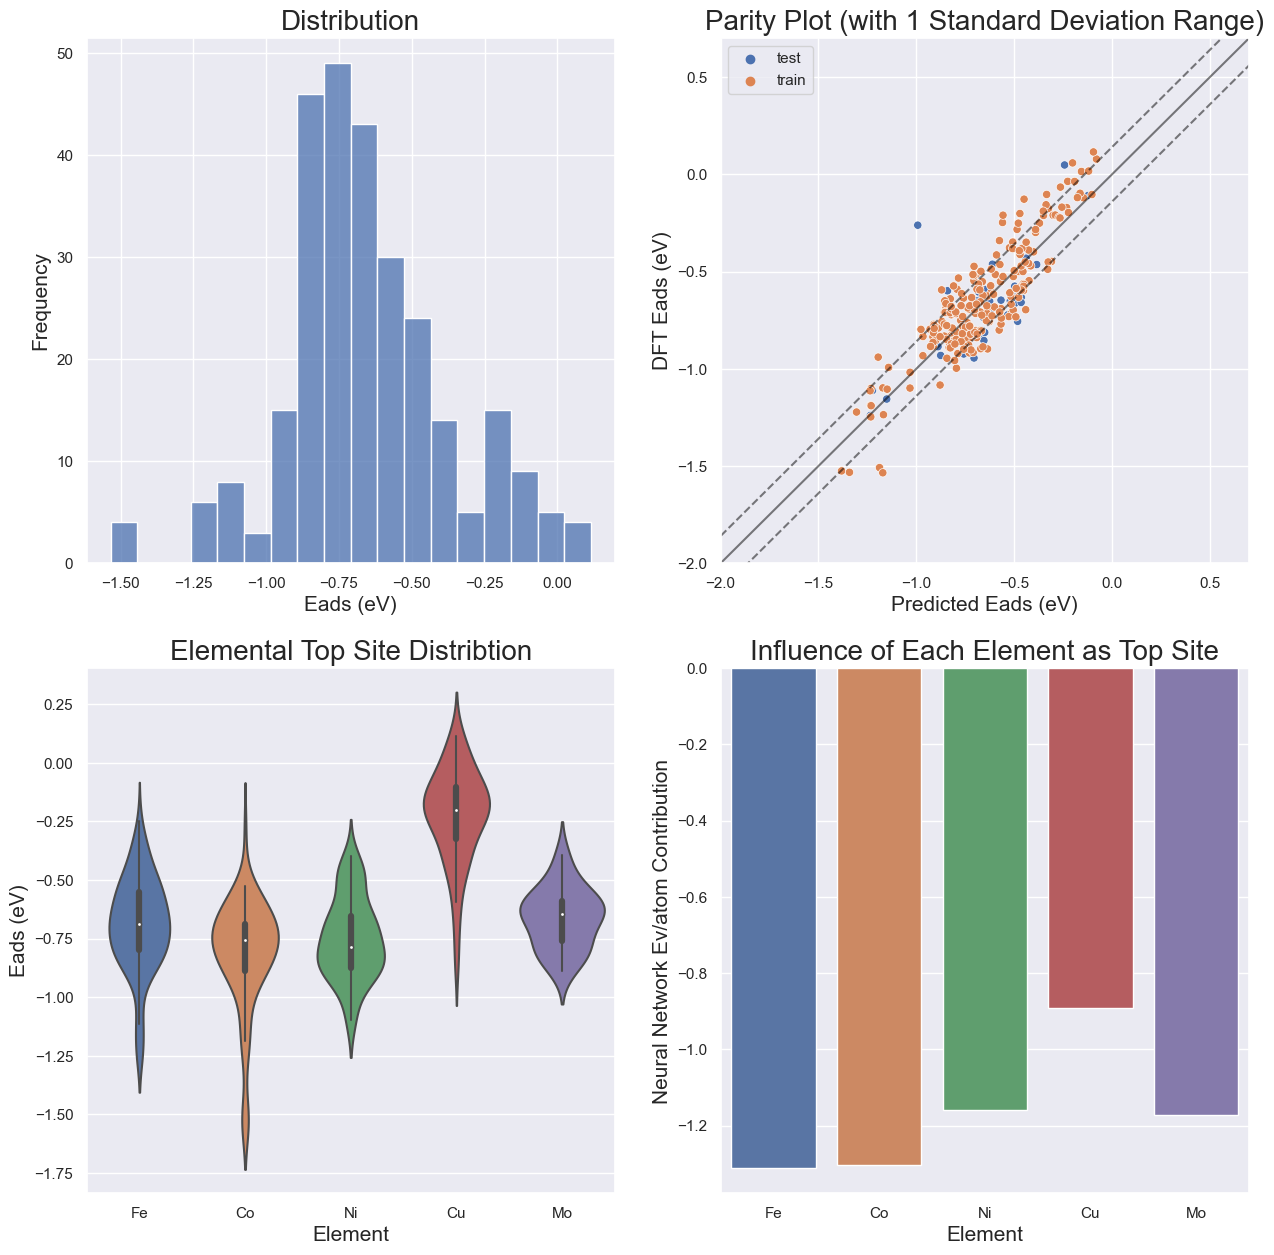

In [3]:
#Data visualization summarizing Distribution, NN performance, Element influences
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

x1=sns.barplot(ax=axes[1, 1],x="Element", y="Ev/atom", data=vis,order=['Fe','Co','Ni','Cu','Mo'])
x1.set_xlabel("Element", fontsize = 15)
x1.set_ylabel("Neural Network Ev/atom Contribution", fontsize = 15)
x1.set_title("Influence of Each Element as Top Site", fontsize = 20)

x2=sns.violinplot(ax=axes[1, 0],x=df_COOH.columns[0], y="Eads", data=df_COOH,order=[ 'Fe','Co','Ni','Cu','Mo'])
x2.set_xlabel("Element", fontsize = 15)
x2.set_ylabel("Eads (eV)", fontsize = 15)
x2.set_title("Elemental Top Site Distribtion", fontsize = 20)

x3=sns.histplot(ax=axes[0, 0],data=df_COOH, x='Eads')
x3.set_xlabel("Eads (eV)", fontsize = 15)
x3.set_ylabel("Frequency", fontsize = 15)
x3.set_title("Distribution", fontsize = 20)

x4=sns.scatterplot(ax=axes[0,1],data=df, x='predict',y='real',hue='label',marker='o', color='b')
x4.set(xlim=(-2,0.7))
x4.set(ylim=(-2,0.7))
x4.plot([-4,4],[-4,4],color='black',alpha=0.5) 
x4=sns.lineplot(ax=axes[0,1],x='x',y='lines',data=df1,color='black',alpha  = 0.5)
x4.lines[1].set_linestyle("--")
x4=sns.lineplot(ax=axes[0,1],x='x',y='lines',data=df2,color='black',alpha  = 0.5)
x4.lines[2].set_linestyle("--")
x4.set_xlabel("Predicted Eads (eV)", fontsize = 15)
x4.set_ylabel("DFT Eads (eV)", fontsize = 15)
x4.set_title("Parity Plot (with 1 Standard Deviation Range)", fontsize = 20)
#plt.savefig('fig')

What these graph/plots essentially display is the propensity for HEA surfaces to have incredibly complex and wide ranging adsorption sites. Pictured below is the electron distribution of Hydrogen Monolayer coverage on HEAs. As you can see, HEAs multi-element surfaces makes each top/bridge/hollow site unique unlike mono-metal surfaces

<p width="10%">
    <img width="90%" src="images/diff.png"> 
</p>

*Credit to Ethan Halpren for the VASP Calculations visualized in the figure above*